In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("/content/spam.csv",encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last three column
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [ ]:
df.sample(5)

,v1,v2
4783,ham,Indeed and by the way it was either or - not b...
5094,ham,"Hi Shanil,Rakhesh here.thanks,i have exchanged..."
5278,spam,URGENT! Your Mobile number has been awarded wi...
4545,ham,Never try alone to take the weight of a tear t...
933,ham,What time you think you'll have it? Need to kn...


In [ ]:
# renaming the columns
df.rename(columns = {"v1":"Target","v2":"Text"}, inplace = True)
df.sample(5)

,Target,Text
1584,ham,"Sorry, I'll call later"
2043,spam,4mths half price Orange line rental & latest c...
578,spam,"our mobile number has won å£5000, to claim cal..."
1010,ham,Lol I would but my mom would have a fit and te...
5112,spam,December only! Had your mobile 11mths+? You ar...


In [ ]:
# lable encoder
# convert the categorical data to numerical .. lable encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [ ]:
df["Target"] = encoder.fit_transform(df["Target"])
#Fit: The fit part of fit_transform learns the unique categories present in the "Target" column and assigns each one a unique number.
#Transform: The transform part then converts each category into its corresponding numerical value based on what was learned in the fit step.

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

403

In [ ]:
# need to remove the duplicate values
df = df.drop_duplicates(keep = "first")   #The keep parameter controls which duplicates (if any) are kept.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
# EDA
# check the percent of ham and spam messages
df["Target"].value_counts()


Target
0    4516
1     653
Name: count, dtype: int64

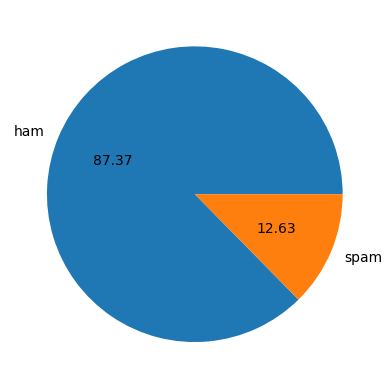

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(), labels  = ["ham","spam"] , autopct = "%0.2f")
plt.show()

In [ ]:
# data is imbalanced

In [ ]:
import nltk

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# count number of characters
df["num_characters"] = df["Text"].apply(len)

In [ ]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# number of words
df["num_words"] = df["Text"].apply(lambda x : len(nltk.word_tokenize(x)))
# Uses the NLTK word_tokenize function to tokenize (split) the text x into individual words.
# into a list

In [ ]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# num of senteneces
df["num_sentences"] = df["Text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# split the ham and the spam
# ham
df[df["Target"]== 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam
df[df["Target"]== 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

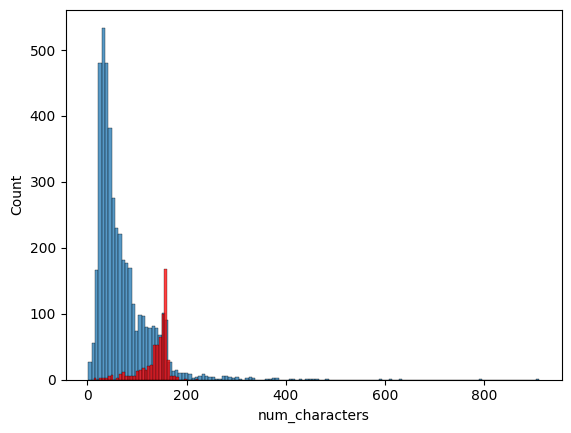

In [ ]:
sns.histplot(df[df["Target"] == 0]["num_characters"])
sns.histplot(df[df["Target"] == 1]["num_characters"],color = "red")

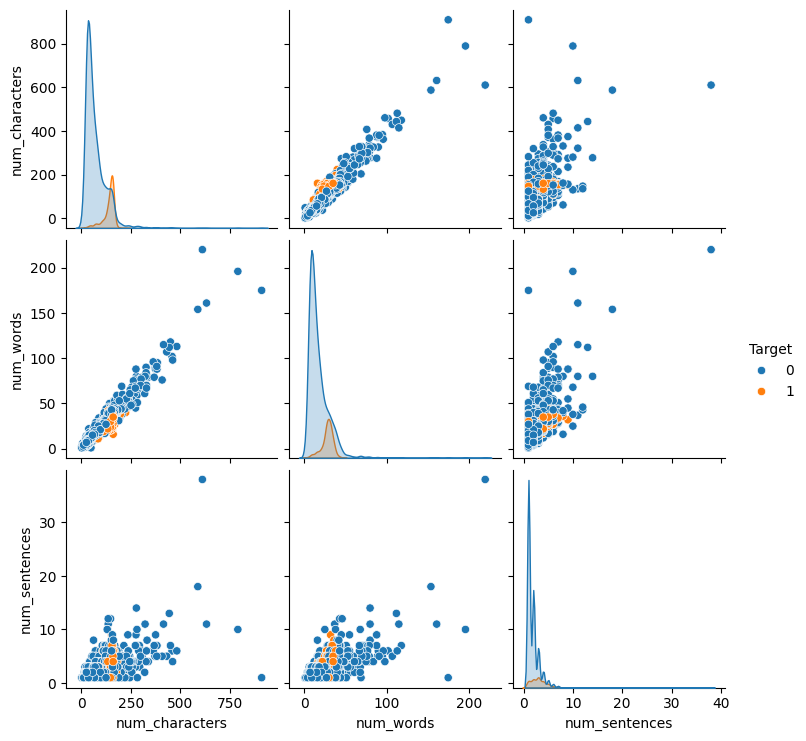

In [ ]:
sns.pairplot(df,hue = "Target")

In [ ]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
# Select only integer columns
int_columns = df.select_dtypes(include=['int64']).columns

In [ ]:
df[int_columns].corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

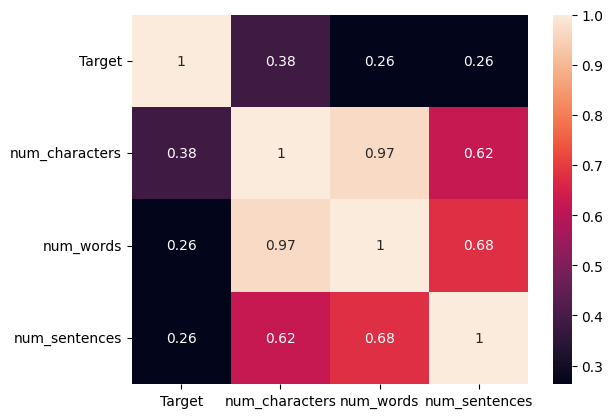

In [ ]:
# heat map
sns.heatmap(df[int_columns].corr(), annot = True)

## data preprocessing


*   Lower case
*   tokenization
*   Removinf special character
*   Removing stop words and punctuation
*   stemming( changing the words to the root word)



In [ ]:
# convert to lower
def transform_text(text):
  text = text.lower()

  # tokentization
  text = nltk.word_tokenize(text)

  # removing special character
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:] # cloing list
  y.clear()

  # removing stop words
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

   # stemming
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)#Many text processing tasks or algorithms expect text in a string format rather than a list of tokens.

In [ ]:
transform_text("HI HOW Are YOu 55 shrushti what are you doing in the classes !$#")

'hi 55 shrushti class'

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# for puntuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dacing")
#The Porter Stemmer is a popular algorithm for stemming words in English. It works by removing common suffixes from words to find their root form.

'dace'

In [ ]:
df["transformed_text"] = df["Text"].apply(transform_text)

In [ ]:
df.head(1)

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [ ]:
# make a word colud of the spam messages
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

In [ ]:
wc.generate(df[df["Target"] == 1])
#The TypeError you're encountering is because the WordCloud.generate() method expects a string or bytes-like object as input,
# but you are passing a DataFrame or a DataFrame column directly.

TypeError: expected string or bytes-like object

In [ ]:
spam_wc = wc.generate(df[df["Target"] == 1]["transformed_text"].str.cat(sep= " "))

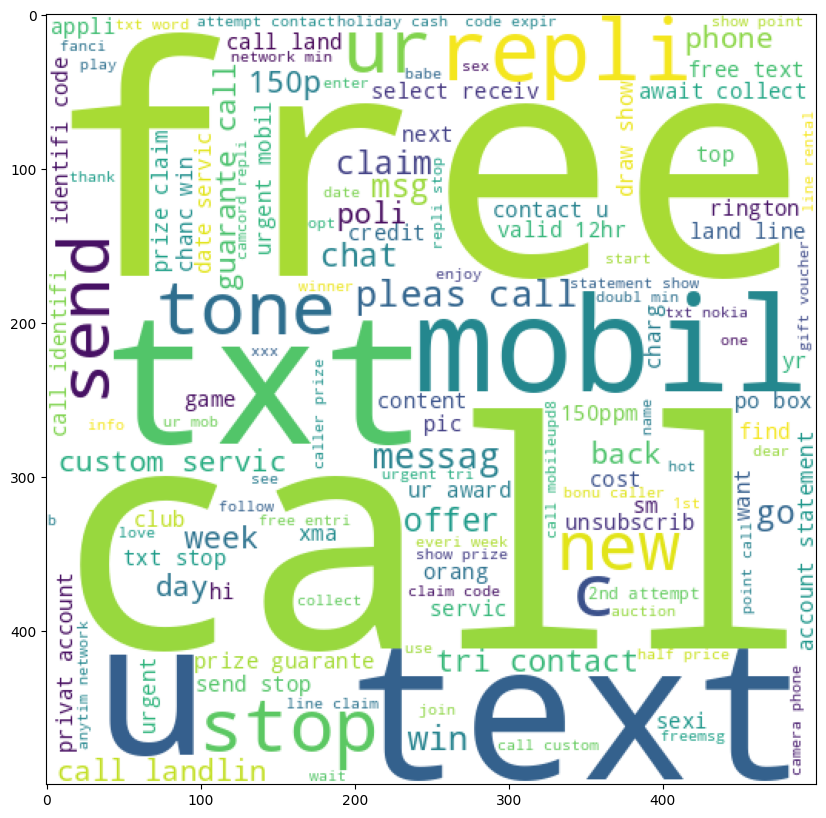

In [ ]:

plt.figure(figsize = (15,10))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df["Target"] == 0]["transformed_text"].str.cat(sep = " "))

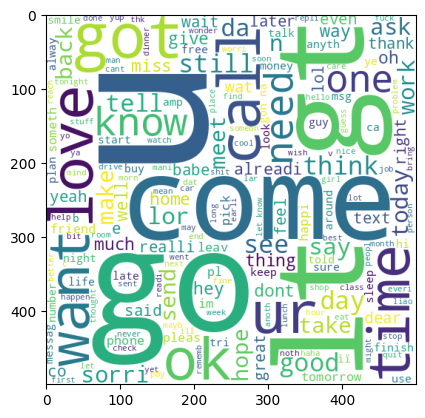

In [ ]:
plt.imshow(ham_wc)

In [ ]:
# top 30 words used
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df["Target"] == 1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9939

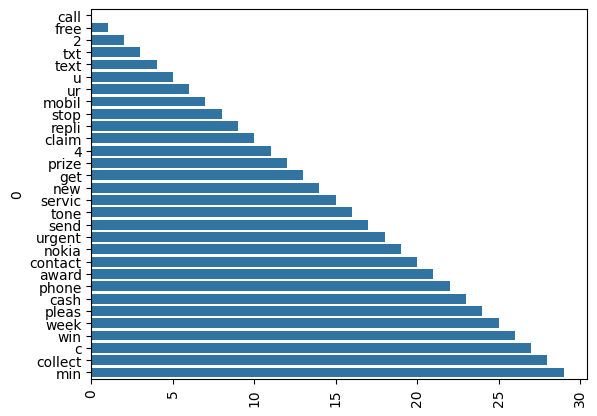

In [ ]:
#Counter from the collections module is a powerful tool in Python for
# counting the frequency of elements in a collection, like a list
# counter is a special dict where is counts the occurence of each unique itms in iterable

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
df.head(1)

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [ ]:
# need to convert the transformed_text to vectors
# vecctorization is used to covert the textual data to numerical
# bag of words is a method to convert the text into vectors wher
#Represents text by counting the frequency of each word in a document, ignoring grammar and word order.
# mostly for the textual dataset we use the naive bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [ ]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()
# fit learn the data and tranform does the work of tranforming the learned data into numerical
# toarray it coverts the spares matrix to the array

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df["Target"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# the data is imbalance we need the correct precision
# tfidf -> mnb

In [ ]:
# we will check the precision for all the algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df.head()

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576


In [ ]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))